# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import joblib


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

head_df = df.head()
print(head_df)

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

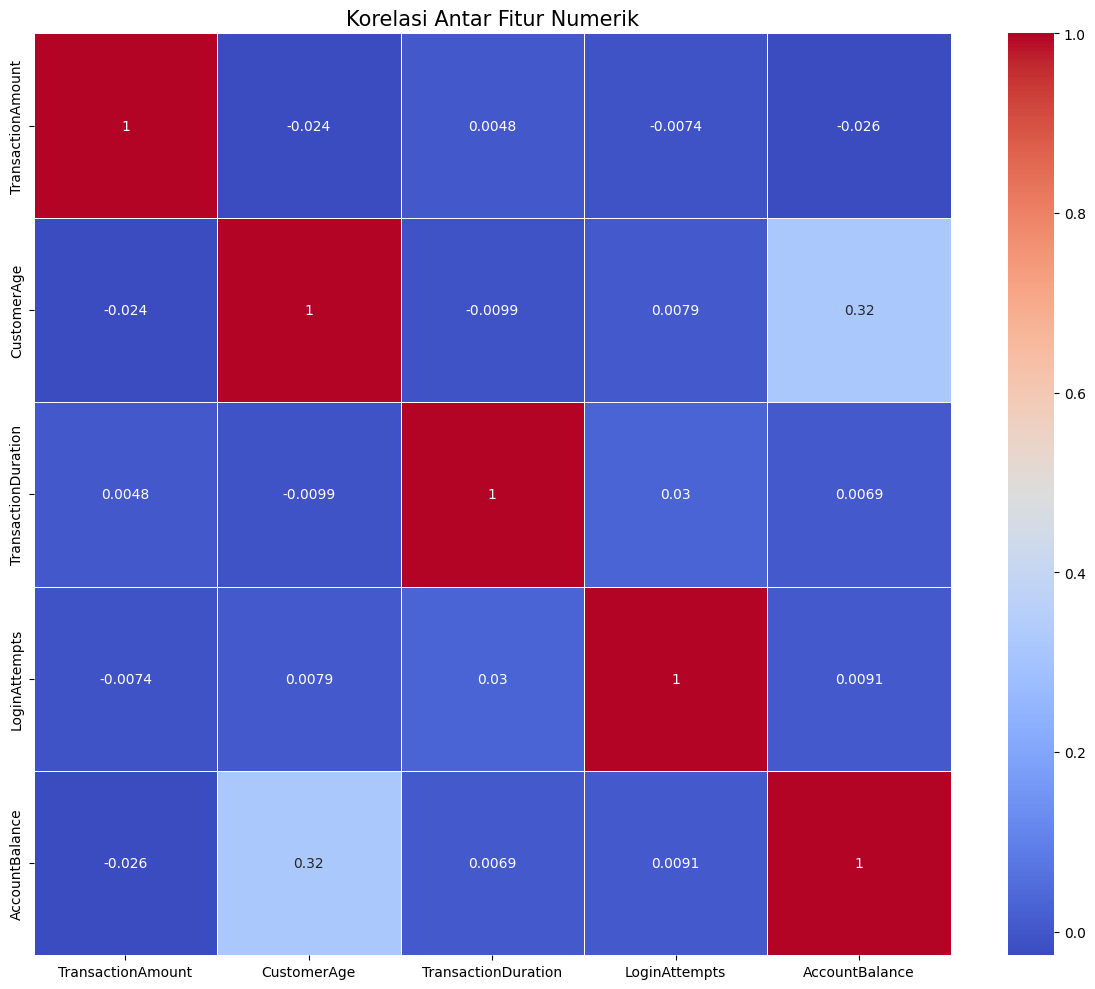

In [5]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12, 10))
# Pilih hanya kolom numerik untuk korelasi
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Fitur Numerik', fontsize=15)
plt.tight_layout()
plt.show()


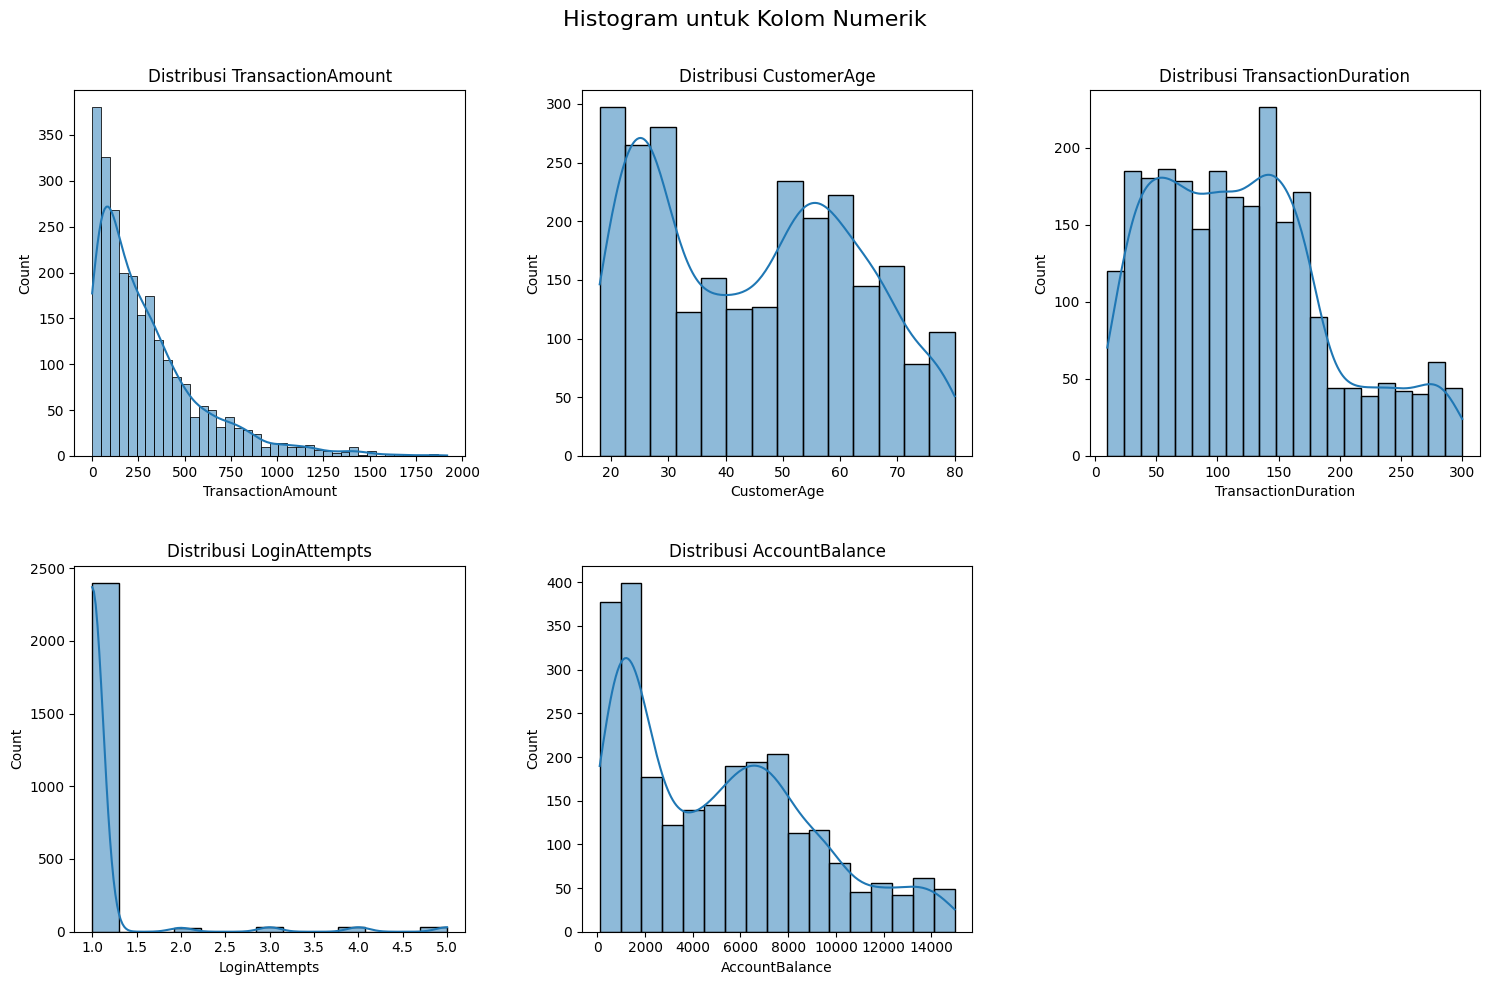

In [6]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.3)
plt.suptitle('Histogram untuk Kolom Numerik', fontsize=16)
plt.show()


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**


Feature Encoding dengan LabelEncoder:

Data sebelum encoding:
  TransactionType   Location Channel CustomerOccupation
0           Debit  San Diego     ATM             Doctor
1           Debit    Houston     ATM             Doctor
2           Debit       Mesa  Online            Student
3           Debit    Raleigh  Online            Student
4          Credit    Atlanta  Online            Student

Mapping untuk TransactionType (5 nilai pertama):
  Debit -> 1
  Credit -> 0

Mapping untuk Location (5 nilai pertama):
  San Diego -> 36
  Houston -> 15
  Mesa -> 23
  Raleigh -> 33
  Atlanta -> 1

Mapping untuk Channel (5 nilai pertama):
  ATM -> 0
  Online -> 2
  Branch -> 1

Mapping untuk CustomerOccupation (5 nilai pertama):
  Doctor -> 0
  Student -> 3
  Retired -> 2
  Engineer -> 1

Data setelah encoding:
  TransactionType Location Channel CustomerOccupation
0               1       36       0                  0
1               1       15       0                  0
2               1      

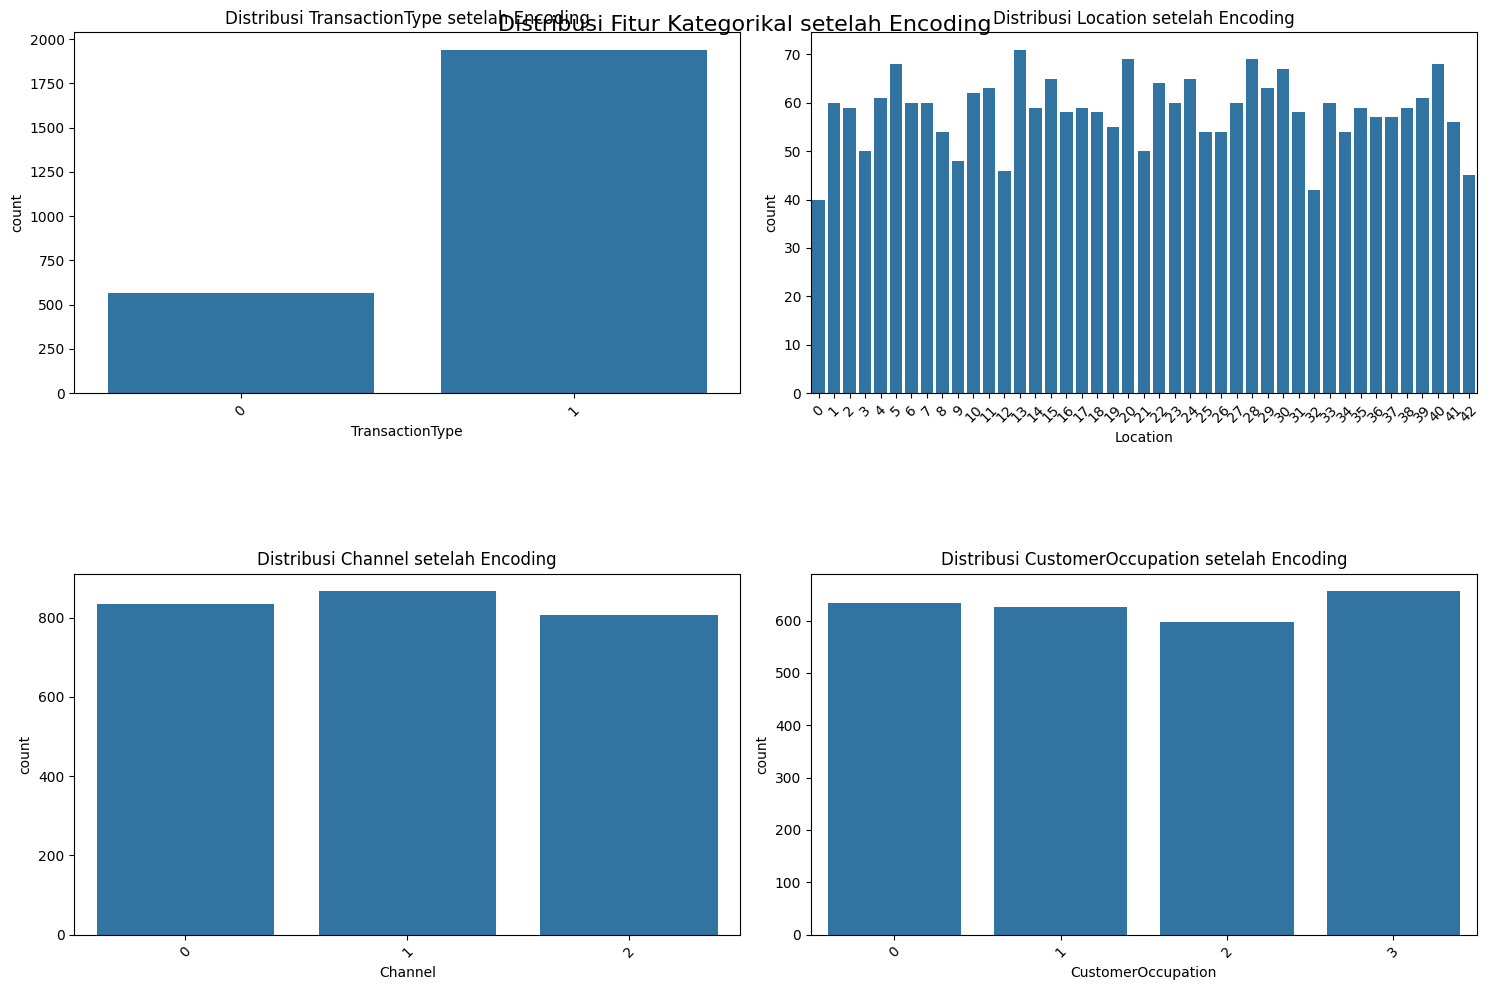

In [7]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Melakukan feature encoding menggunakan LabelEncoder untuk fitur kategorikal
print("\nFeature Encoding dengan LabelEncoder:")
cat_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Buat salinan dataframe untuk mempertahankan data asli
df_encoded = df.copy()

# Tampilkan beberapa baris data kategorikal sebelum encoding
print("\nData sebelum encoding:")
print(df[cat_cols].head())

# Lakukan encoding
encoder = LabelEncoder()
for col in cat_cols:
    # Simpan data non-null untuk encoding
    non_null_mask = df_encoded[col].notna()
    non_null_values = df_encoded.loc[non_null_mask, col]

    # Fit dan transform hanya untuk nilai non-null
    df_encoded.loc[non_null_mask, col] = encoder.fit_transform(non_null_values)

    # Tampilkan mapping dari nilai ke angka (untuk contoh pertama)
    unique_values = df[col].dropna().unique()[:5]  # Batasi ke 5 nilai unik pertama
    encoded_values = encoder.transform(unique_values)

    print(f"\nMapping untuk {col} (5 nilai pertama):")
    for orig, enc in zip(unique_values, encoded_values):
        print(f"  {orig} -> {enc}")

# Tampilkan beberapa baris data setelah encoding
print("\nData setelah encoding:")
print(df_encoded[cat_cols].head())

# Tampilkan distribusi nilai untuk setiap kolom kategorikal setelah encoding
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_encoded, x=col)
    plt.title(f'Distribusi {col} setelah Encoding')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribusi Fitur Kategorikal setelah Encoding', fontsize=16)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [8]:
# Mengecek dataset menggunakan isnull().sum()
print(df.isnull().sum())

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [9]:
# Mengecek dataset menggunakan duplicated().sum()
print("Duplikat:", df.duplicated().sum())

Duplikat: 21


In [10]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [11]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'], axis=1, inplace=True)


In [12]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
cat_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [13]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Menangani data yang hilang (menggunakan metode imputasi)
# Untuk kolom numerik, kita gunakan median
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Untuk kolom kategorikal, kita gunakan modus
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Untuk kolom tanggal, kita gunakan tanggal terdekat
df['TransactionDate'] = df['TransactionDate'].fillna(method='ffill')
df['PreviousTransactionDate'] = df['PreviousTransactionDate'].fillna(method='ffill')

<ipython-input-13-a5b6387c1152>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TransactionDate'] = df['TransactionDate'].fillna(method='ffill')
<ipython-input-13-a5b6387c1152>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PreviousTransactionDate'] = df['PreviousTransactionDate'].fillna(method='ffill')


In [14]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
print("Jumlah duplikat setelah dihapus:", df.duplicated().sum())



Jumlah duplikat setelah dihapus: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [15]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

     # Mengidentifikasi outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Jumlah outlier pada {column}: {len(outliers)}")

    # Menangani outlier (capping method)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

    # Menangani outlier pada TransactionAmount dan AccountBalance
print("\n=== Handling Outliers ===")
df = handle_outliers(df, 'TransactionAmount')
df = handle_outliers(df, 'AccountBalance')


=== Handling Outliers ===
Jumlah outlier pada TransactionAmount: 113
Jumlah outlier pada AccountBalance: 0


In [16]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
print("\n=== Binning Data ===")
print("Statistik CustomerAge sebelum binning:")
print(df['CustomerAge'].describe())

# lakukan pada satu sampai dua fitur numerik.
bins = [0, 0.25, 0.5, 0.75, 1.0]  # Karena sudah di-scale dengan MinMaxScaler
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels)

# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
encoder = LabelEncoder()
df['AgeGroup'] = encoder.fit_transform(df['AgeGroup'])
print("\nHasil binning CustomerAge:")
print(df['AgeGroup'].value_counts())

# Binning TransactionDuration ke dalam kategori durasi
bins = [0, 0.33, 0.66, 1.0]  # Karena sudah di-scale dengan MinMaxScaler
labels = ['Short', 'Medium', 'Long']
df['DurationCategory'] = pd.cut(df['TransactionDuration'], bins=bins, labels=labels)

# Encode hasil binning
df['DurationCategory'] = encoder.fit_transform(df['DurationCategory'])
print("\nHasil binning TransactionDuration:")
print(df['DurationCategory'].value_counts())

# Memeriksa hasil akhir
print("\nInformasi dataset setelah pembersihan dan preprocessing lanjutan:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())


=== Binning Data ===
Statistik CustomerAge sebelum binning:
count    2514.000000
mean        0.429415
std         0.286157
min         0.000000
25%         0.145161
50%         0.435484
75%         0.661290
max         1.000000
Name: CustomerAge, dtype: float64

Hasil binning CustomerAge:
AgeGroup
3    842
1    701
0    521
2    394
4     56
Name: count, dtype: int64

Hasil binning TransactionDuration:
DurationCategory
2    1150
1    1036
0     322
3       6
Name: count, dtype: int64

Informasi dataset setelah pembersihan dan preprocessing lanjutan:
<class 'pandas.core.frame.DataFrame'>
Index: 2514 entries, 0 to 2535
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2514 non-null   float64
 1   TransactionDate          2514 non-null   object 
 2   TransactionType          2514 non-null   int64  
 3   Location                 2514 non-null   int64  
 4   Channel     

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [17]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
df.describe()

# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,DurationCategory
count,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,0.147655,0.787987,21.284010,1.01074,0.429415,1.530231,0.377490,0.030430,0.336864,1.686158,1.334129
std,0.130069,0.437042,12.397534,0.83084,0.286157,1.150477,0.240156,0.148674,0.260683,1.197454,0.695426
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043213,1.000000,11.000000,0.00000,0.145161,0.250000,0.182759,0.000000,0.095324,1.000000,1.000000
50%,0.110014,1.000000,21.000000,1.00000,0.435484,2.000000,0.351724,0.000000,0.311416,2.000000,1.000000
75%,0.213328,1.000000,32.000000,2.00000,0.661290,3.000000,0.520690,0.000000,0.506870,3.000000,2.000000
max,0.468501,2.000000,43.000000,3.00000,1.000000,4.000000,1.000000,1.000000,1.000000,4.000000,3.000000


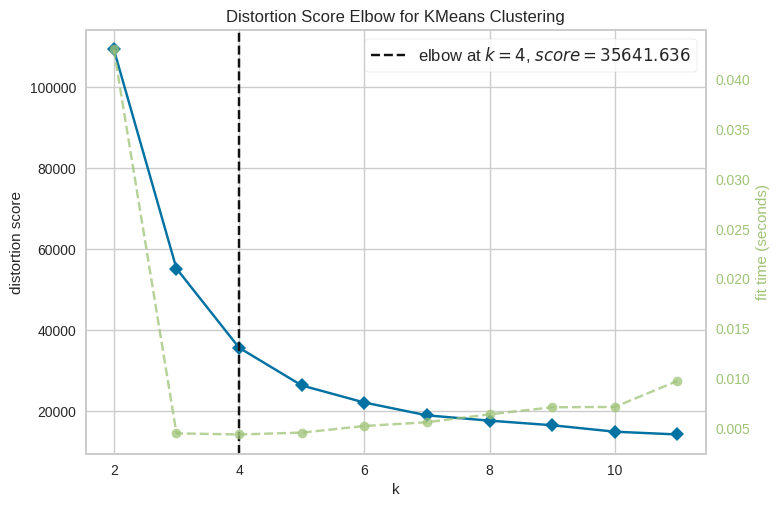

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
from yellowbrick.cluster import KElbowVisualizer
df_cluster = df.drop(['TransactionDate', 'PreviousTransactionDate'], axis=1, errors='ignore')
# Drop rows with missing values
df_cluster = df_cluster.dropna()

# Initialize model
model = KMeans(random_state=42)
# Instantiate the elbow method visualizer
visualizer = KElbowVisualizer(model, k=(2, 12))

# Fit the data to the visualizer
visualizer.fit(df_cluster)
# Finalize and render the figure
visualizer.show()

In [19]:
# Menggunakan algoritma K-Means Clustering
from sklearn.cluster import KMeans

# Set the number of clusters based on the elbow method
n_clusters = 4
model_kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model
model_kmeans.fit(df_cluster)

# Add the cluster labels to the dataframe
df_cluster['Target'] = model_kmeans.labels_

# Display the count of samples in each cluster
print("Number of samples in each cluster:")
print(df_cluster['Target'].value_counts())

Number of samples in each cluster:
Target
2    695
0    670
3    592
1    557
Name: count, dtype: int64


Jalankan cell code ini untuk menyimpan model kamu.

In [20]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [21]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_cluster.drop('Target', axis=1), df_cluster['Target'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.4733


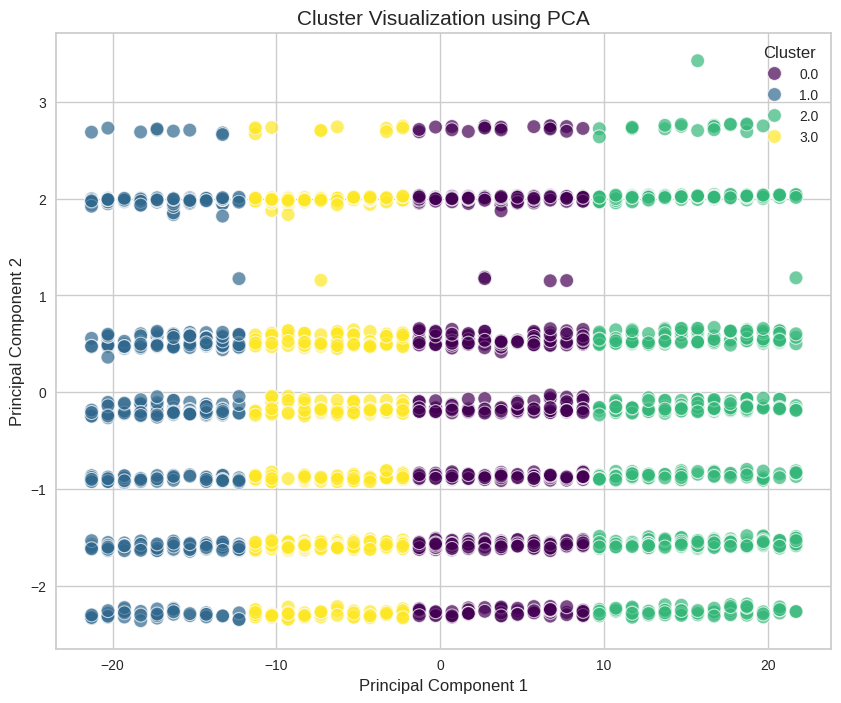

In [22]:
# Membuat visualisasi hasil clustering
import matplotlib.pyplot as plt
import seaborn as sns

# Reduksi dimensi menggunakan PCA untuk visualisasi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cluster.drop('Target', axis=1))

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df_cluster['Target']

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Cluster Visualization using PCA', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [23]:
# Membangun model menggunakan PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create pipeline with PCA and KMeans
pca_model = Pipeline([
    ('pca', PCA(n_components=3)),
    ('kmeans', KMeans(n_clusters=n_clusters, random_state=42))
])

# Fit the model
pca_model.fit(df_cluster.drop('Target', axis=1))

# Add PCA + KMeans results to the dataframe
df_cluster['PCA_Target'] = pca_model.predict(df_cluster.drop(['Target'], axis=1))

# Display the count of samples in each cluster
print("Number of samples in each PCA-based cluster:")
print(df_cluster['PCA_Target'].value_counts())

Number of samples in each PCA-based cluster:
PCA_Target
0    656
2    640
1    619
3    599
Name: count, dtype: int64


In [24]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca_model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [25]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Menampilkan analisis deskriptif untuk setiap cluster
cluster_analysis = df_cluster.groupby('Target').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'TransactionType': ['mean', lambda x: x.mode().iloc[0] if not x.mode().empty else None],
    'Location': ['mean', lambda x: x.mode().iloc[0] if not x.mode().empty else None],
    'Channel': ['mean', lambda x: x.mode().iloc[0] if not x.mode().empty else None],
    'CustomerOccupation': ['mean', lambda x: x.mode().iloc[0] if not x.mode().empty else None]
})

print(cluster_analysis)

       TransactionAmount                     CustomerAge            \
                    mean       min       max        mean  min  max   
Target                                                               
0               0.143187  0.000000  0.468501    0.427347  0.0  1.0   
1               0.146156  0.000031  0.468501    0.442491  0.0  1.0   
2               0.150847  0.000599  0.468501    0.413599  0.0  1.0   
3               0.150376  0.000099  0.468501    0.438018  0.0  1.0   

       TransactionDuration                LoginAttempts  ... AccountBalance  \
                      mean  min       max          mean  ...            min   
Target                                                   ...                  
0                 0.380489  0.0  1.000000      0.033209  ...       0.000774   
1                 0.376271  0.0  1.000000      0.030072  ...       0.001885   
2                 0.368192  0.0  0.986207      0.021223  ...       0.000000   
3                 0.386160  0.0  0.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [26]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_cluster.rename(columns={'Cluster': 'Target'}, inplace=True, errors='ignore')

In [27]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_cluster.to_csv('data_clustering.csv', index=False)
print("Data berhasil disimpan ke file 'data_clustering.csv'")

Data berhasil disimpan ke file 'data_clustering.csv'


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [28]:
# inverse dataset ke rentang normal
df_inverse = df.copy()
df_inverse['Target'] = df_cluster['Target']

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [29]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

print(df_inverse.head())



   TransactionAmount      TransactionDate  TransactionType  Location  Channel  \
0           0.007207  2023-04-11 16:29:14                1        36        0   
1           0.195940  2023-06-27 16:44:19                1        15        0   
2           0.065680  2023-07-10 18:16:08                1        23        2   
3           0.096016  2023-05-05 16:32:11                1        33        2   
4           0.006874  2023-10-16 17:51:24                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710                   0             0.244828            0.0   
1     0.806452                   0             0.451724            0.0   
2     0.016129                   3             0.158621            0.0   
3     0.129032                   3             0.051724            0.0   
4     0.435484                   3             0.648276            0.0   

   AccountBalance PreviousTransactionDate  AgeGroup  DurationCategor

In [30]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)